In [2]:
from spectralradex import radex
import numpy as np
from astropy import units as u 
from astropy import constants as c
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('paper')

In [3]:
# params = radex.get_default_parameters()

# params['tkin'] = 40
# params['h2'] = 1e4

# params['molfile'] = 'hnco.dat'
# params['cdmol'] = 1e-8 *5e22
# params['linewidth'] = 30.0
# params['fmin'] = 87.925
# params['fmax'] = 87.926

# for key,value in params.items():
#     print(f"\t{key} : {value}")
    
# output = radex.run(params)
# output.head()

In [40]:
params = radex.get_example_grid_parameters()

params['tkin'] = np.arange(30,150,10)
params['h2'] = 10**np.arange(2,6.1,0.05)
# params['h2'] = 10**np.arange(2,6.1,0.1)

X_hnco = 1e-8
# X_hnco = 1e-9
# X_hnco = 5e-8

N_h2 = 8.5e22 
params['cdmol'] = X_hnco * N_h2

params['molfile'] = 'hnco.dat'
params['linewidth'] = 30.1
# params['linewidth'] = 10*2.355
params['fmin'] = 87.925
params['fmax'] = 87.926

grid_df = radex.run_grid(params, target_value="T_R (K)")

1.9952623149688422


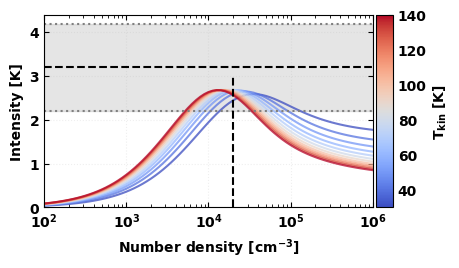

In [72]:
fig, (ax, cbar_ax) = plt.subplots(ncols=2, figsize=(4.5,2.5), gridspec_kw={'width_ratios': [20, 1]})

cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=np.min(params['tkin']), vmax=np.max(params['tkin']))
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, label=r'T$_\mathrm{kin}$ [K]')

for i, T in enumerate(params['tkin']):
    
    grid_df_ = grid_df[grid_df['tkin']==T]
    n = grid_df_['h2']
    Trad = grid_df_['(4_0_4)-(3_0_3)[87.92523962 GHz]']
    
    ax.plot(n, Trad, color=cmap(norm(T)), alpha=0.75)
    
    if T == 60: 
        n_peak = n.values[np.argmax(Trad)]
        c_peak = cmap(norm(T))
    
# ax.plot([1e2,1e5],[1.57,1.57],'k--') # mean int
ax.plot([1e2,1e6],[3.2+1, 3.2+1],'k:', color='grey') # mean max
ax.fill_between([1e2,1e6], 2.2, 4.2, alpha=0.2, zorder=-1, color='grey')
ax.plot([1e2,1e6],[3.2, 3.2],'k--') 
ax.plot([1e2,1e6],[3.2-1, 3.2-1],'k:', color='grey')

ax.vlines(n_peak, 0, 3, color='k', ls='--')
print(n_peak/1e4)

ax.set_xscale('log')
ax.set_xlabel('Number density [cm$^{-3}$]')
ax.set_ylabel('Intensity [K]')

ax.set_xlim([1e2, 1e6])
ax.set_ylim([0, 4.4])

ax.grid(True)
fig.subplots_adjust(wspace=0.02)

fig.savefig('../figures/hnco_radex.pdf', transparent=True)

In [79]:
def get_volume_shell(r1, r2):
    v1 = 4/3 * np.pi * r1**3
    v2 = 4/3 * np.pi * r2**3
    return(v2-v1)

def get_mass(v, n):
    N = n*v
    m = N*c.m_p
    return(m.to('Msun')) 

n_low = 8e3 *u.cm**-3    
n = n_peak *u.cm**-3
n_up = 4e4 *u.cm**-3

r1 = 4.5 *u.pc
r2 = 5.5 *u.pc
v = get_volume_shell(r1, r2)

print('%0.1f x10^5 Msun' %(get_mass(v, n).value/1e5))
print('%0.1f x10^5 Msun' %(get_mass(v, n_low).value/1e5))
print('%0.1f x10^5 Msun' %(get_mass(v, n_up).value/1e5))

1.6 x10^5 Msun
0.6 x10^5 Msun
3.1 x10^5 Msun
